<a href="https://colab.research.google.com/github/mahdighorbel/Supervised-machine-learning/blob/master/Cardio_vascular_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv("cardi_vascular.csv")
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,man,168,62.0,110,80,normal,normal,No,No,Yes,Absence
1,1,20228,woman,156,85.0,140,90,well above normal,normal,No,No,Yes,Presence
2,2,18857,woman,165,64.0,130,70,well above normal,normal,No,No,No,Presence
3,3,17623,man,169,82.0,150,100,normal,normal,No,No,Yes,Presence
4,4,17474,woman,156,56.0,100,60,normal,normal,No,No,No,Absence


#Pre Process

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.rename(columns={'age':'age_in_days'},inplace=True)
data['gender']=data['gender'].map({"woman":1,"man":0})
data['cholesterol']=data['cholesterol'].map({"normal":1, "above normal":2, "well above normal":3})
data['gluc']=data['gluc'].map({"normal":1, "above normal":2, "well above normal":3})
data['smoke']=data['smoke'].map({"Yes":1 ,"No":0})
data['alco']=data['alco'].map({"Yes":1 ,"No":0})
data['active']=data['active'].map({"Yes":1 ,"No":0})
data['cardio']=data['cardio'].map({"Absence":0,"Presence":1})
data.head()

,id,age_in_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,0,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,0,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Visualiser la distribution de ap_hi (Systolic blood pressure)

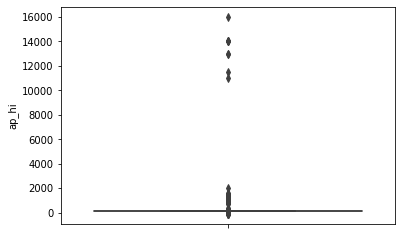

In [ ]:
sns.boxplot(y="ap_hi",data=data)

In [ ]:
len(data[data["ap_hi"]>250].index)

40

In [ ]:
len(data[data["ap_hi"]>250].index)*100/70000

0.05714285714285714

Effacar les lignes dont le ap_hi est (-) et >250

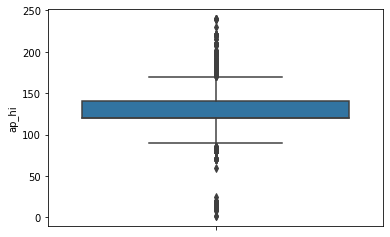

In [ ]:
l=data[data["ap_hi"]>250].index
data=data.drop(l|data[data["ap_hi"]<0].index,axis=0)
data[data["ap_hi"]>250]
data[data["ap_hi"]<0]
sns.boxplot(y="ap_hi",data=data)

Visualiser la distribution de ap_lo (diastolic blood pressure)

In [ ]:
len(data[data["ap_lo"]>200].index)

953

In [ ]:
len(data[data["ap_lo"]>200].index)*100/len(data)

1.3623432876359842

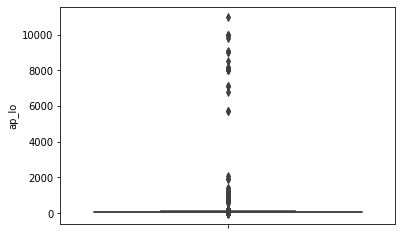

In [ ]:
sns.boxplot(y="ap_lo",data=data)

Effacar les lignes dont le ap_lo est (-) et >250

In [ ]:
data=data.drop(data[data["ap_lo"]>200].index|(data[data["ap_lo"]<0].index),axis=0)
len(data[data["ap_lo"]<0].index)

0

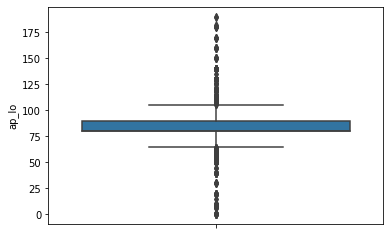

In [ ]:
sns.boxplot(y="ap_lo",data=data)

Ajouter une colonne Indice de Masse Corporelle (IMC)

In [ ]:
data.insert(5,"IMC",round((data["weight"]*10**4/(data["height"]**2)),1))
data.head()

,id,age_in_days,gender,height,weight,IMC,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,0,168,62.0,22.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34.9,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23.5,130,70,3,1,0,0,0,1
3,3,17623,0,169,82.0,28.7,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23.0,100,60,1,1,0,0,0,0


Classification selon IMC

In [ ]:
data.loc[data["IMC"]<=18.5,"inter_IMC"]="maigreur"
data.loc[(data["IMC"] > 18.5 )& (data["IMC"]<=24.9),"inter_IMC"]="normal"
data.loc[(data["IMC"] >= 25) & (data["IMC"]<=29.9),"inter_IMC"]="surpoids"
data.loc[data["IMC"]>=30,"inter_IMC"]="obese"
data["inter_IMC"]=data["inter_IMC"].map({"maigreur":0,"normal":1, "surpoids":2, "obese":3})
data.head(1)

,id,age_in_days,gender,height,weight,IMC,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,inter_IMC
0,0,18393,0,168,62.0,22.0,110,80,1,1,0,0,1,0,1


Ajouter colonne Diabétique 


1. Glycémie normale entre 0.7 et 1 g/L de sang
2. Hyperglycémie modérée	entre 1 et 1.25g/L de sang
3. Diabète	Supérieur à 1.26g/L de sang


In [ ]:
data.loc[data["gluc"]==1,"diabet"]=int(0)
data.loc[data["gluc"]>1,"diabet"]=int(1)
data.head()

,id,age_in_days,gender,height,weight,IMC,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,inter_IMC,diabet
0,0,18393,0,168,62.0,22.0,110,80,1,1,0,0,1,0,1,0.0
1,1,20228,1,156,85.0,34.9,140,90,3,1,0,0,1,1,3,0.0
2,2,18857,1,165,64.0,23.5,130,70,3,1,0,0,0,1,1,0.0
3,3,17623,0,169,82.0,28.7,150,100,1,1,0,0,1,1,2,0.0
4,4,17474,1,156,56.0,23.0,100,60,1,1,0,0,0,0,1,0.0


#Pression Arterielle: La valeur normale de la pression artérielle est de 120(hi)/80(lo)
La valeur limite au-delà de laquelle on parle d’hypertension artérielle est de 140/90 (peut aussi etre 135/851)

Hypertension
une pression artérielle élevée peut amener le cœur à pomper le sang moins efficacement.
*Plus la tension est élevée, plus le risque de maladie cardio-vasculaire est important.*
> hypertension et l'age:les artères perdent en élasticité aved l'age.
hypertension et tabac: le tabagisme provoque un élévation de la pression artérielle.



Hypotension
https://www.revmed.ch/var/site/storage/images/rms-170/images/rms_idpas_d_isbn_pu2008-32s_sa03_art03_img002.jpg/644541-1-fre-CH/RMS_idPAS_D_ISBN_pu2008-32s_sa03_art03_img002.jpg_i1140.jpg

In [ ]:
data[["ap_hi","ap_lo"]].describe()

,ap_hi,ap_lo
count,68999.000000,68999.000000
mean,126.322497,81.333976
std,17.708323,9.872897
min,7.000000,0.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,240.000000,190.000000


classifier selon ap_hi et ap_lo

*   0: Normal
*   1: Elevated
*   2: Hypertension


In [ ]:
data.loc[(data["ap_hi"] <180 )& (data["ap_lo"]<=80),"Blood_Pressure_Range"]=0
data.loc[(data["ap_hi"] >=120 )&(data["ap_hi"]<=129  )& (data["ap_lo"]<=80),"Blood_Pressure_Range"]=1
data.loc[(data["ap_hi"] >=130) | (data["ap_lo"]>80),"Blood_Pressure_Range"]=2
data.head()

,id,age_in_days,gender,height,weight,IMC,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,inter_IMC,diabet,Blood_Pressure_Range
0,0,18393,0,168,62.0,22.0,110,80,1,1,0,0,1,0,1,0.0,0.0
1,1,20228,1,156,85.0,34.9,140,90,3,1,0,0,1,1,3,0.0,2.0
2,2,18857,1,165,64.0,23.5,130,70,3,1,0,0,0,1,1,0.0,2.0
3,3,17623,0,169,82.0,28.7,150,100,1,1,0,0,1,1,2,0.0,2.0
4,4,17474,1,156,56.0,23.0,100,60,1,1,0,0,0,0,1,0.0,0.0


In [ ]:
data=data[["id","age_in_days","gender","height","weight","IMC","inter_IMC","gluc","diabet","ap_hi","ap_lo","Blood_Pressure_Range","cholesterol","smoke","alco","active","cardio"]]

#Data Viz

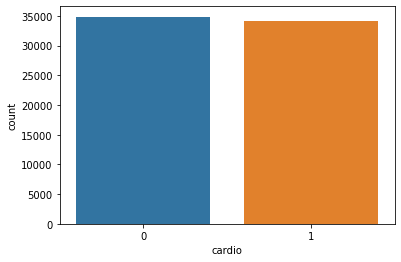

In [ ]:
sns.countplot(x="cardio",data=data)

1:Yes 0:No

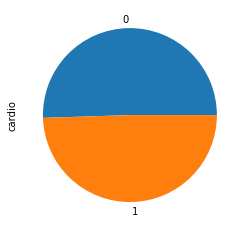

In [ ]:
data["cardio"].value_counts().plot(kind='pie')


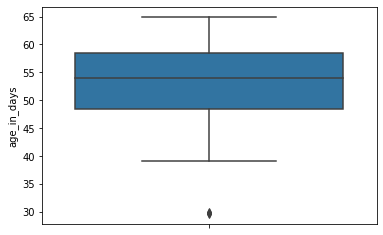

In [ ]:
sns.boxplot(y=data["age_in_days"]/365)


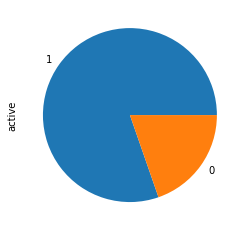

In [ ]:
data["active"].value_counts().plot(kind='pie')


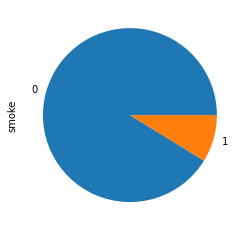

In [ ]:
data["smoke"].value_counts().plot(kind='pie')


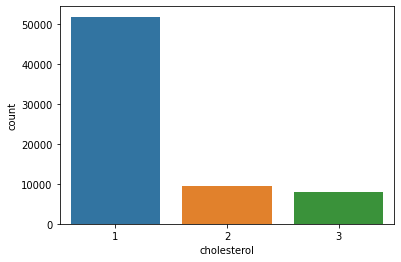

In [ ]:
sns.countplot(x="cholesterol",data=data)

1: normal, 2: above normal, 3: well above normal

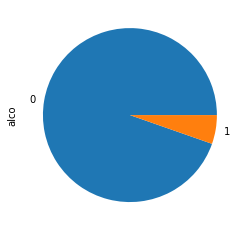

In [ ]:
data["alco"].value_counts().plot(kind='pie')


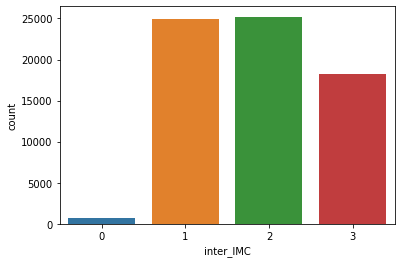

In [ ]:
sns.countplot(x="inter_IMC",data=data)


0:maigreur 1:normal 2:surpoids 3:obese


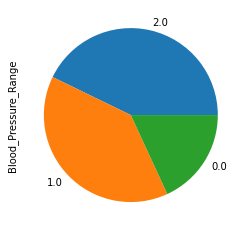

In [ ]:
data["Blood_Pressure_Range"].value_counts().plot(kind='pie')


0: Normal
1: Elevated
2: Hypertension


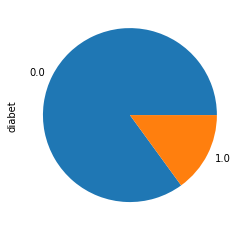

In [ ]:
data["diabet"].value_counts().plot(kind='pie')


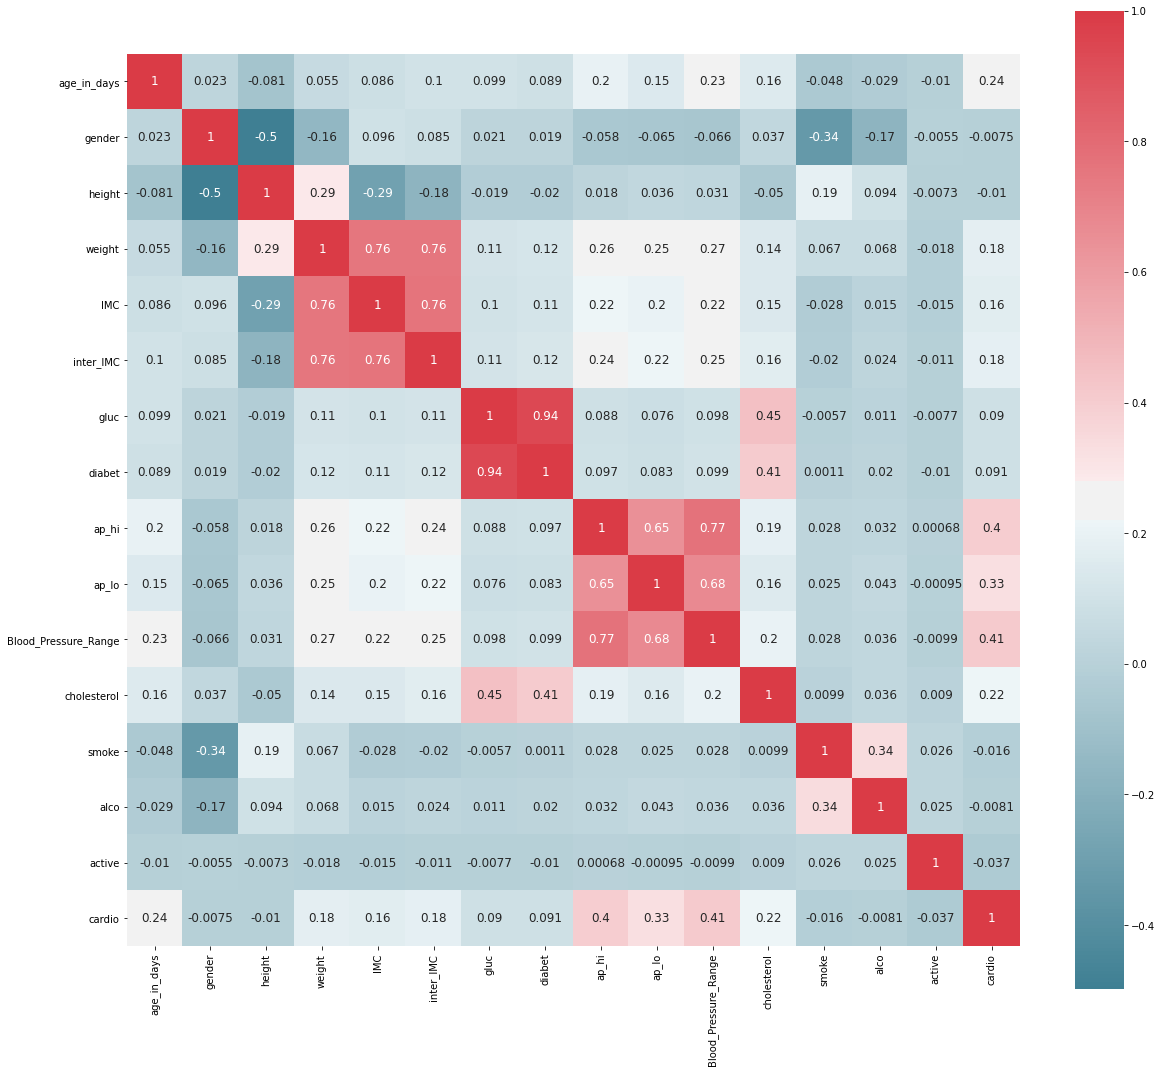

In [ ]:
import matplotlib.pyplot as plt


def plot_correlation_map(df):
    corr=df.corr()
    s,ax= plt.subplots(figsize =(20,20))
    cmap=sns.diverging_palette(220,10,as_cmap = True)
    s=sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={'shrink':.9}, ax=ax, annot= True, annot_kws ={'fontsize':12})
plot_correlation_map(data.drop(columns=["id"],axis=1))

woman:1,man:0
           smoke
gender          
0       0.218902
1       0.017713


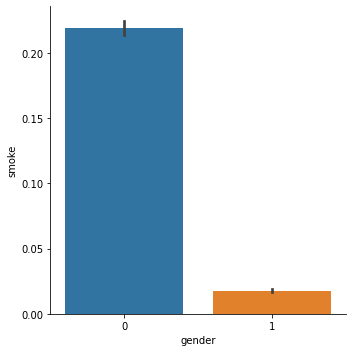

In [ ]:
sns.catplot(x="gender", y="smoke",kind="bar", data=data)
print("woman:1,man:0")
print(data[["gender","smoke"]].groupby(["gender"],as_index=True).mean())

            active
alco smoke        
0    0       48774
     1        3525
1    0        1582
     1        1545


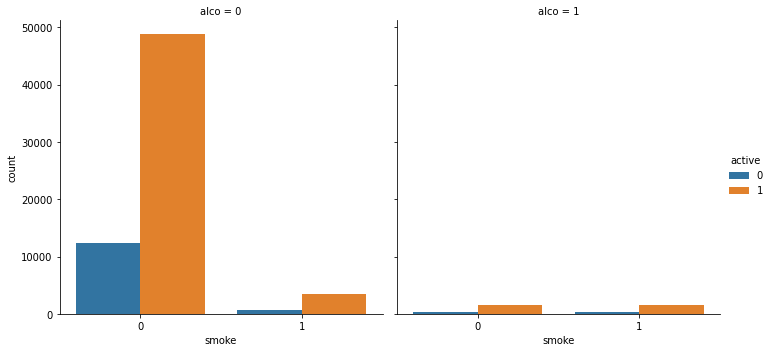

In [ ]:
sns.catplot(x="smoke",col="alco",hue="active",kind='count', data=data)
print(data[["alco","smoke","active"]].groupby(["alco","smoke"],as_index=True).sum())

In [ ]:
data[data["cardio"]==1].describe()


,id,age_in_days,gender,height,weight,IMC,inter_IMC,gluc,diabet,ap_hi,ap_lo,Blood_Pressure_Range,cholesterol,smoke,alco,active,cardio
count,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.000000,34146.0
mean,50077.153869,20061.608680,0.647660,164.273590,76.723974,28.528519,2.031775,1.277719,0.182715,133.503251,84.614069,1.553564,1.516195,0.083202,0.051748,0.788321,1.0
std,28822.939259,2315.338826,0.477706,8.260905,14.875820,6.378023,0.802042,0.624988,0.386439,18.407685,10.070997,0.643440,0.776382,0.276191,0.221522,0.408505,0.0
min,1.000000,14275.000000,0.000000,55.000000,11.000000,3.500000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,25248.500000,18391.000000,0.000000,159.000000,66.000000,24.500000,1.000000,1.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
50%,50131.500000,20387.500000,1.000000,165.000000,75.000000,27.400000,2.000000,1.000000,0.000000,130.000000,80.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.0
75%,74989.500000,21902.000000,1.000000,170.000000,85.000000,31.500000,3.000000,1.000000,0.000000,140.000000,90.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.0
max,99998.000000,23713.000000,1.000000,250.000000,200.000000,298.700000,3.000000,3.000000,1.000000,240.000000,190.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.0


This is the list of the most influencing features for cardio



In [ ]:
data.corr().loc[:,'cardio'].abs().sort_values(ascending=False)[1:]


Blood_Pressure_Range    0.410044
ap_hi                   0.401371
ap_lo                   0.328847
age_in_days             0.239734
cholesterol             0.221404
inter_IMC               0.182871
weight                  0.179982
IMC                     0.163592
diabet                  0.091294
gluc                    0.089772
active                  0.037266
smoke                   0.016325
height                  0.010396
alco                    0.008116
gender                  0.007528
id                      0.003728
Name: cardio, dtype: float64

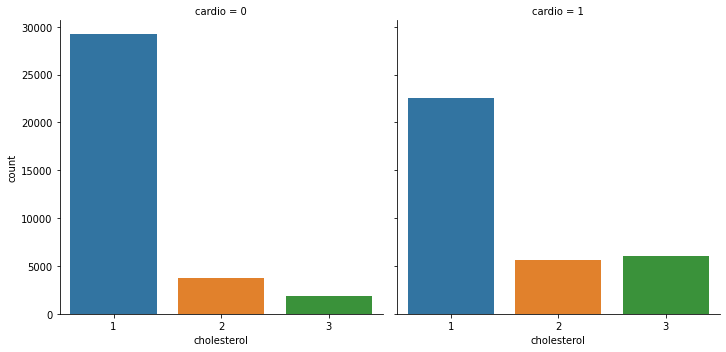

In [ ]:
sns.catplot(x="cholesterol",col="cardio",kind='count', data=data)

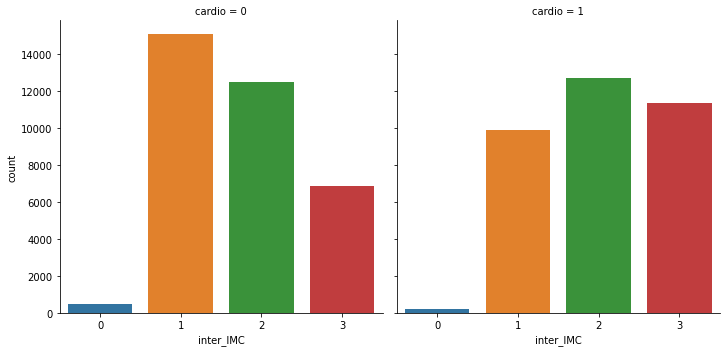

In [ ]:
sns.catplot(x="inter_IMC",col="cardio",kind='count', data=data)

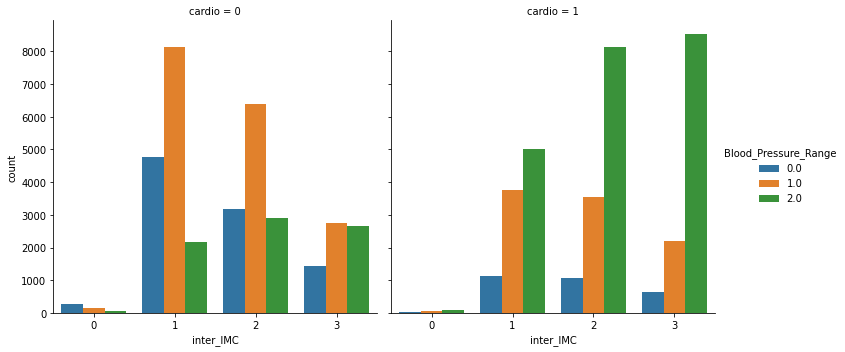

In [ ]:
sns.catplot(x="inter_IMC",hue="Blood_Pressure_Range",col="cardio",kind='count', data=data)

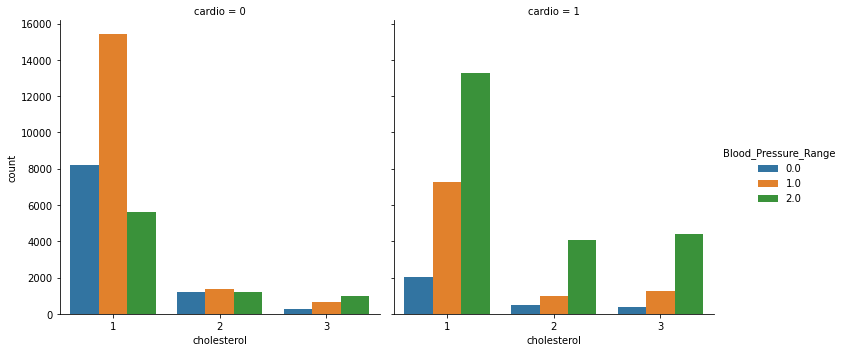

In [ ]:
sns.catplot(x="cholesterol",hue="Blood_Pressure_Range",col="cardio",kind='count', data=data)

        cardio
smoke         
0      0.49741
1      0.46858


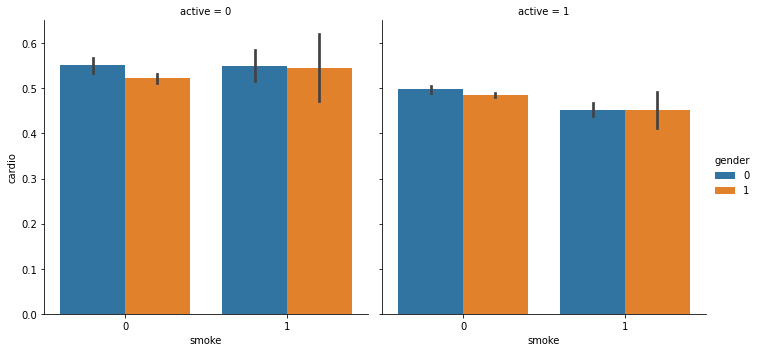

In [ ]:
sns.catplot(x="smoke", y="cardio", hue="gender",col="active" ,kind ="bar", data=data)
print(data[["cardio","smoke"]].groupby(["smoke"],as_index=True).mean())

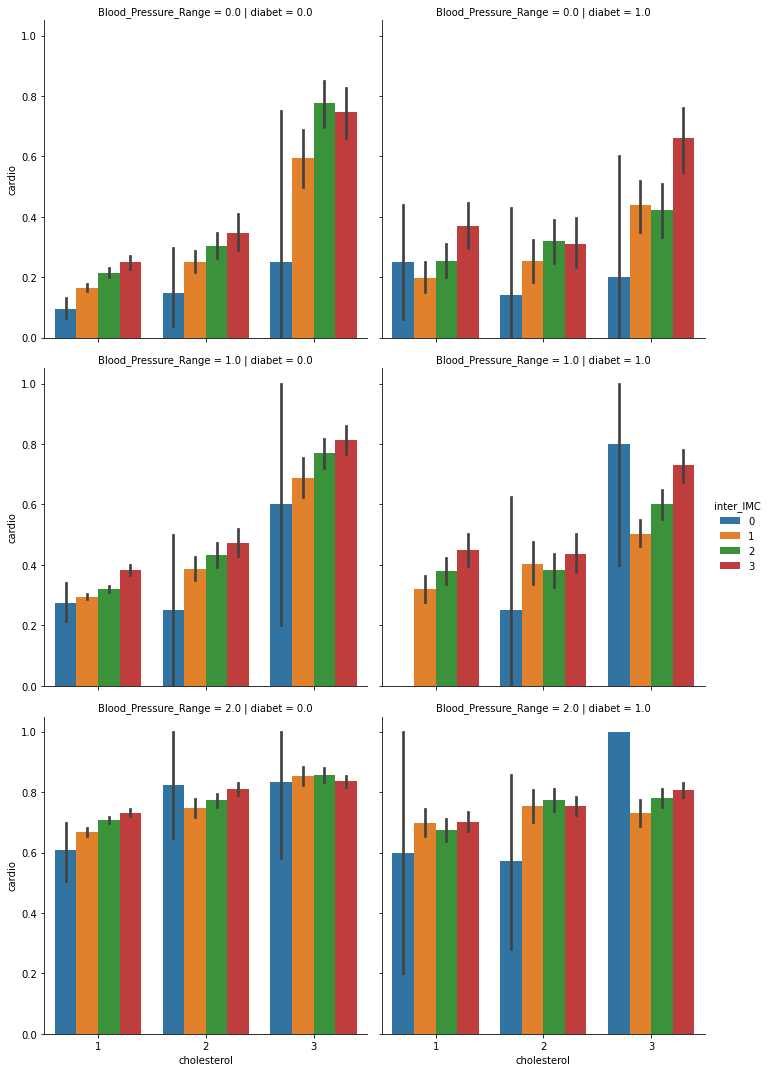

In [ ]:
sns.catplot(x="cholesterol",y="cardio",col="diabet",hue="inter_IMC",row='Blood_Pressure_Range' ,kind='bar', data=data)

Explication :

In [ ]:
df=data[["inter_IMC","diabet","cholesterol","cardio","Blood_Pressure_Range"]].groupby(["Blood_Pressure_Range","diabet","cholesterol","inter_IMC"],as_index=True).mean()
df

cardio
Blood_Pressure_Range diabet cholesterol inter_IMC          
0.0                  0.0    1           0          0.096386
                                        1          0.165648
                                        2          0.214466
                                        3          0.249084
                            2           0          0.148148
...                                                     ...
2.0                  1.0    2           3          0.754453
                            3           0          1.000000
                                        1          0.731646
                                        2          0.779851
                                        3          0.807599

[72 rows x 1 columns]

#Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics


Accuracy: 0.7247536231884057
Predicted     0     1
Actual               
0          6528  2197
1          2551  5974
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      8725
           1       0.73      0.70      0.72      8525

    accuracy                           0.72     17250
   macro avg       0.73      0.72      0.72     17250
weighted avg       0.73      0.72      0.72     17250



Text(0.5, 1.0, 'confusion_matrix')

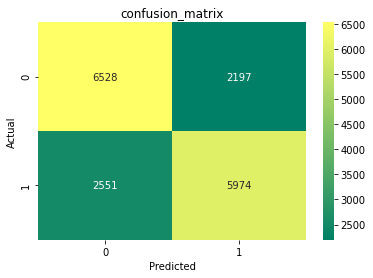

In [ ]:

x=data[["age_in_days","alco","smoke","cholesterol","active","inter_IMC","gluc","Blood_Pressure_Range"]]

y=data["cardio"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)
clf=RandomForestClassifier(n_estimators=100,max_depth=8) #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model

y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
import matplotlib.pyplot as plt
plt.title('confusion_matrix')


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)


0.7244786528749926

# Test


In [ ]:
def interimc(IMC):
  if IMC<=18.5 :
    inter_imc=0
  elif (IMC > 18.5 )& (IMC<=24.9):
    inter_imc=1
  elif (IMC >= 25) & (IMC<=29.9):
    inter_imc=2
  else :
     inter_imc=3
  return inter_imc   


In [ ]:
def bloodrange(apHI,apLO):
  if (apHI<120)& (apLO<=80):
    return 0
  elif (apHI>=120 )&(apHI<=129  )& (apLO<=80):
    return 1
  elif (apHI >=130) | (apLO>80) :
    return 2

In [ ]:
def test():
  print(" enter birthday")
  birthyear=int(input("birthyear :"))
  birthmonth=int(input("birthmonth : "))
  birthday=int(input('birthdate : '))
  AgeInDays=(2020-birthyear)*365+birthmonth*30+birthday
  alco=int(input('do you drink alcohol(yes=1 ,no=0) : '))
  smoke=int(input('do you smoke(yes=1 ,no=0) : '))
  active=int(input('are you active(yes=1 ,no=0) : '))
  weight=float(input("Weight : "))
  height=float(input("Height :" ))
  IMC=(weight*10**4)/(height**2)
  print("Your IMC=",IMC)
  gluc=int(input("Glucose(1: normal, 2: above normal, 3: well above normal ) : "))
  cholesterol=int(input("cholesterol( 1: normal, 2: above normal, 3: well above normal) :  "  ))
  apHI=int(input("Systolic blood pressure" ))
  apLO=int(input("Diastolic blood pressure"))
  result=clf.predict([[AgeInDays,alco,smoke,active,interimc(IMC),gluc,cholesterol,bloodrange(apHI,apLO)]])[0]
  if result==1:
    print(" a cardiovascular disease has been detected you should see a cardiologist")
  elif bloodrange(apHI,apLO)>1:
    print(" you should see a cardiologist you may suffer from a hypertension crises")
  else :
    print("you're fine")  

In [ ]:
test()


 enter birthday
birthyear :1955
birthmonth : 3
birthdate : 8
do you drink alcohol(yes=1 ,no=0) : 0
do you smoke(yes=1 ,no=0) : 0
are you active(yes=1 ,no=0) : 1
Weight : 82
Height :180
Your IMC= 25.308641975308642
Glucose(1: normal, 2: above normal, 3: well above normal ) : 2
cholesterol( 1: normal, 2: above normal, 3: well above normal) :  1
Systolic blood pressure12
Diastolic blood pressure8
you're fine
